# Task 1
Use any of the linear regression models created so far to consider the univariate linear regression model between the target and the feature most correlated with it. Create one model using the scikit-learn library and another manually based on the notebook from the lesson. 
Compare the models on a chart. Are they the same?

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

I am going to use the same dataset that I used to create the linear regression model some time ago, the notebook is availabe here: https://github.com/sylwiaSekula/Analyses-statistics-algorithms--English/blob/f3d2a6825c35b9a69d3e4a1e4b428720ceb5fdf2/Diamonds-Linear%20regression%20-%20Feature%20Engineering.ipynb

In [29]:
data_frame = pd.read_csv('./Diamonds Prices2022.csv',index_col=0)

In [30]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


The dataset contains data on 53,940 round-cut diamonds with 10 features:
1. carat - weight of the diamond (numerical data),
2. cut - cut quality of the cut (Fair, Good, Very Good, Premium, Ideal) (categorical data),
3. color - color diamond colour, from J (worst) to D (best) (caegorical data),
4. clarity - clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) (categorical data),
5. depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)(numerical data),
6. table - table width of top of diamond relative to widest point (43--95) (numerical data),
7. price - price in US dollars,(numerical data),
8. x - length in mm (numerical data), 
9. y - width in mm (numerical data),
10. z - depht in mm (numerical data).

In [31]:
#create the train and test datasets
lin_X_train, lin_X_test, lin_y_train, lin_y_test = train_test_split(data_frame[['carat']], data_frame[['price']], test_size=0.33, random_state=42)

In [32]:
# Step 1 - create a linear regression using scikit learn library
model = LinearRegression()
model.fit(lin_X_train, lin_y_train)#fit

LinearRegression()

In [33]:
lin_y_pred_train = model.predict(lin_X_train)#predict

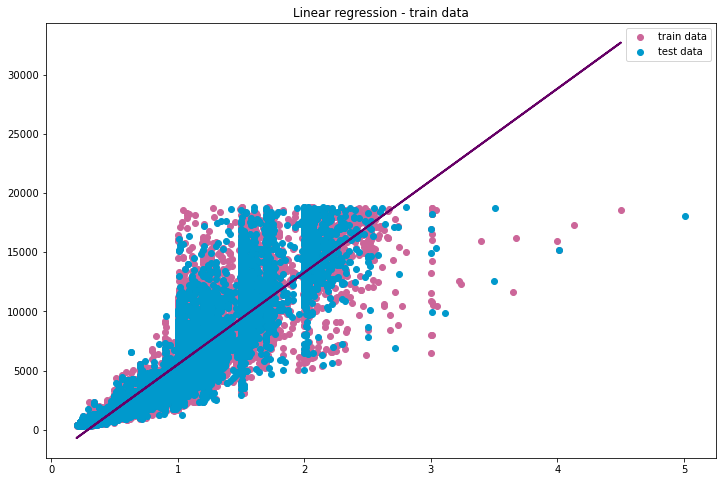

In [55]:
plt.figure(figsize=(12, 8))
plt.scatter(lin_X_train, lin_y_train, color='#cc6699', label='train data')
plt.scatter(lin_X_test, lin_y_test, color='#0099cc', label='test data')
plt.plot(lin_X_train.values.flatten(), lin_y_pred_train.flatten(), color="#660066", linewidth=2)
plt.title('Linear regression - train data')
plt.legend()
plt.show()

In [35]:
lin_y_pred_test = model.predict(lin_X_test)# predict on test data

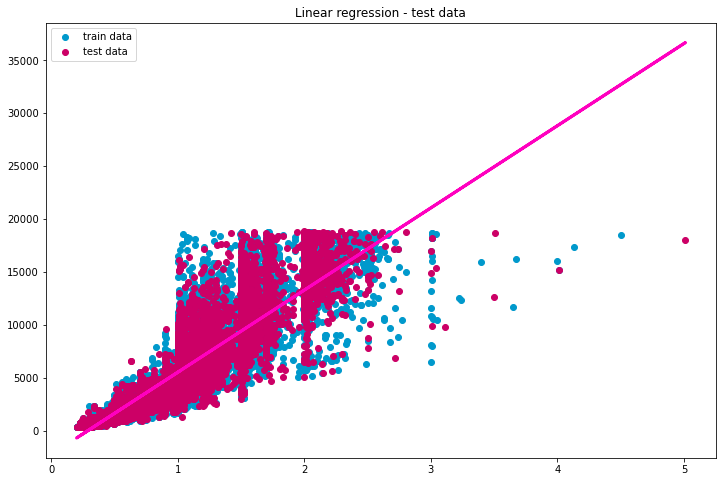

In [54]:
plt.figure(figsize=(12, 8))
plt.scatter(lin_X_train, lin_y_train, color='#0099cc', label='train data')
plt.scatter(lin_X_test, lin_y_test, color='#cc0066', label='test data')
plt.plot(lin_X_test.values.flatten(), lin_y_pred_test.flatten(), color="#ff00bf", linewidth=3)
plt.title('Linear regression - test data')
plt.legend()
plt.show()

In [10]:
#manual creation of a linear regression model
# define loss function
def calculate_cost(y, y_hat):
    n = len(y)
    cost = 1/n * np.sum((y - y_hat)**2)
    return np.sqrt(cost)

In [11]:
#define function for update parameters
def update_params(x, y, y_hat, current_a, current_b, lr):
  # calculate derivative
    db=(np.sum(y_hat-y)*2)/len(y)
    da=(np.dot((y_hat-y),x)*2)/len(y)
  # update params:
    new_a = current_a - lr * da
    new_b = current_b - lr * db
    return new_a, new_b

In [12]:
# define the prediction, linear function
def get_prediction(x, a, b):
    return a*x +b

In [13]:
# define function for initialize random parameters
def initialize():
    a = np.random.random()
    b = np.random.random()
    return a, b

In [14]:
X = data_frame['carat']#feature
y = data_frame['price']#target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#create train and test data

a: 3645.9811114149547, b: 1468.8458959786817
Cost 10 : 2588.3818762502756
a: 7391.812680584138, b: -1909.2236039772818
Cost 100 : 1570.4378405488633
a: 7766.819534673209, b: -2254.298001489138
Cost 1000 : 1558.9776301566833


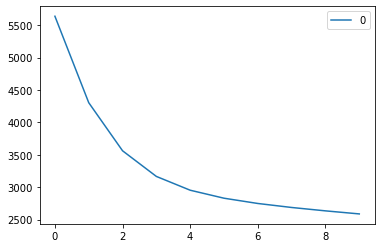

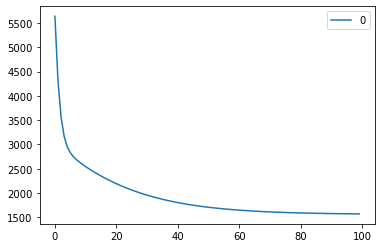

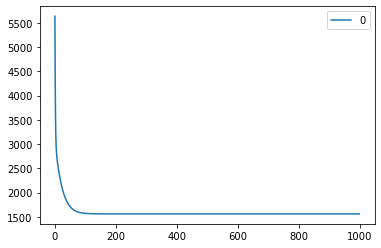

In [53]:
list_of_iterations = [10, 100, 1000]#list of number of iterations

for iteration in (list_of_iterations):
    
#initialize random parameters
    alpha = 0.1
    a, b = initialize()
    costs = []
    for idx in range(iteration):
        y_hat = get_prediction(X_train, a, b)
        y_hat_test = get_prediction(X_test, a, b)
        cost = calculate_cost(y_train, y_hat)
        val_cost = calculate_cost(y_test, y_hat_test)
        a, b = update_params(X_train, y_train, y_hat, a, b, lr=alpha)
        costs.append(cost)

    new_df = pd.DataFrame(costs)
    new_df.plot()
    print('a: {0}, b: {1}'.format(a, b))
    print("Cost",iteration,":",cost)

Above 1000 iterations, the loss function result stopped improving so I will use the parameters a and b returned at iteration 1000.

In [16]:
#define a and b 
a = 7749.089163977718
b = -2252.301942775671

In [17]:
# create the linear regression manually using the parameters a and b
x_col, y_col = 'carat', 'price'
x = np.linspace(data_frame[x_col].min(), data_frame[x_col].max()).reshape(-1, 1)
y = a*x +b

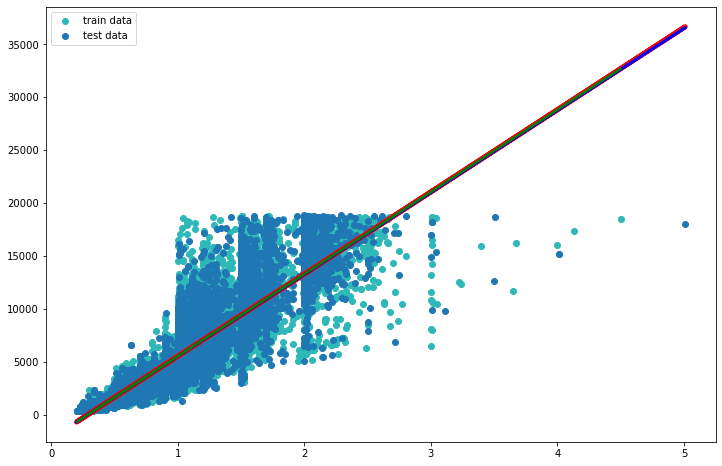

In [49]:
#plotting all the linear models together
plt.figure(figsize=(12, 8))
plt.scatter(lin_X_train, lin_y_train, color='#2eb8b8', label='train data')#train data
plt.scatter(lin_X_test, lin_y_test, label='test data')#test data

plt.plot(lin_X_test.values.flatten(), lin_y_pred_test.flatten(), color="r", linewidth=5)#the scikit linear regression
                                                                                        #model for the train data
plt.plot(x, y, color='b', linewidth=3)#the manual linear regression model
plt.plot(lin_X_train.values.flatten(), lin_y_pred_train.flatten(), color="g", linewidth=2)#the scikit linear regression
plt.legend()                                                                                        #model for the test data
plt.show()

In [19]:
print("MSE linear regression train scikit-learn:", mean_squared_error(lin_y_train, lin_y_pred_train))
print("MSE linear regression test scikit-learn:", mean_squared_error(lin_y_test, lin_y_pred_test))
print("MSE linear regression test manual model:", mean_squared_error(y_test, y_hat_test))

MSE linear regression train scikit-learn: 2430411.251328948
MSE linear regression test scikit-learn: 2332096.7439127318
MSE linear regression test manual model: 2332096.743912627


Compare all three models on the chart we can conclude that they are the same. By calculating the MSE for each of them we can see differencies, but they are acceptable.

# Task 2

Create linear regression models manually:<br>
a) 3 models for the same learning rate but different number of iterations. Let the number of iterations
be different enough from each other so that the models can be compared on the graph and there is a
noticeable difference visible<br>
b) 3 models for the same number of iterations but different learning rate
I will create 3 models with 100 iterations and three different learning rates

a: 7391.844387901782, b: -1909.252780466761
Cost:  1570.435909748957


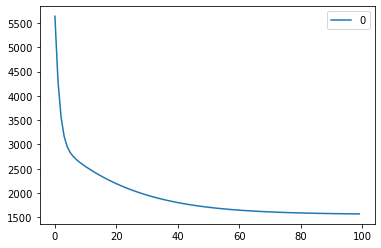

In [20]:
#first model: learning rate: 0.1, iterations:100
alpha = 0.1 #learnign rate 
iteration = 100 #number of iterations
a, b = initialize()
costs = []
for idx in range(iteration):
    y_hat = get_prediction(X_train, a, b)
    y_hat_test = get_prediction(X_test, a, b)
    cost = calculate_cost(y_train, y_hat)
    val_cost = calculate_cost(y_test, y_hat_test)
    a, b = update_params(X_train, y_train, y_hat, a, b, lr=alpha)
    costs.append(cost)

new_df = pd.DataFrame(costs)
new_df.plot()
print('a: {0}, b: {1}'.format(a, b))
print("Cost: ",cost)

a: 854.1729116819232, b: 651.6363076518916
Cost:  4499.905873661942


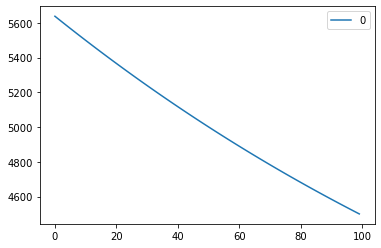

In [21]:
#second model: learning rate: 0.001, iterations:100
alpha = 0.001 #learnign rate 
iteration = 100#number of iterations

a, b = initialize()
costs = []
for idx in range(iteration):
    y_hat = get_prediction(X_train, a, b)
    y_hat_test = get_prediction(X_test, a, b)
    cost = calculate_cost(y_train, y_hat)
    val_cost = calculate_cost(y_test, y_hat_test)
    a, b = update_params(X_train, y_train, y_hat, a, b, lr=alpha)
    costs.append(cost)

new_df = pd.DataFrame(costs)
new_df.plot()
print('a: {0}, b: {1}'.format(a, b))
print("Cost: ",cost)

a: 3595.934360560827, b: 1440.7986260866685
Cost:  2556.7702923426255


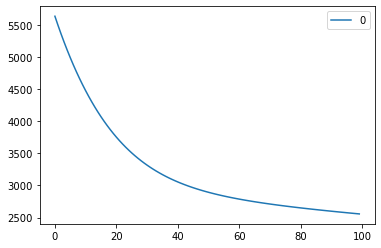

In [22]:
#third model: learning rate: 0.01, iterations:100
alpha = 0.01 #learnign rate
iteration = 100#number of iterations

a, b = initialize()
costs = []
for idx in range(iteration):
    y_hat = get_prediction(X_train, a, b)
    y_hat_test = get_prediction(X_test, a, b)
    cost = calculate_cost(y_train, y_hat)
    val_cost = calculate_cost(y_test, y_hat_test)
    a, b = update_params(X_train, y_train, y_hat, a, b, lr=alpha)
    costs.append(cost)

new_df = pd.DataFrame(costs)
new_df.plot()
print('a: {0}, b: {1}'.format(a, b))
print("Cost: ",cost)

Now I will create 3 models with the learning rate 0.5 and three different numbers of itterations:

a: 7766.815260120908, b: -2254.294068125104
Cost:  1558.9776301585598


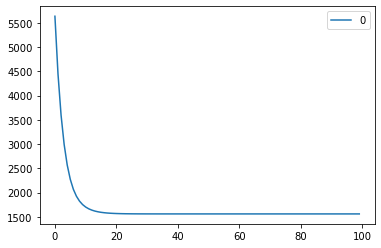

In [23]:
#first model: learning rate: 0.5, iterations:100
alpha = 0.5 #learnign rate
iteration = 100 #number of iterations

a, b = initialize()
costs = []
for idx in range(iteration):
    y_hat = get_prediction(X_train, a, b)
    y_hat_test = get_prediction(X_test, a, b)
    cost = calculate_cost(y_train, y_hat)
    val_cost = calculate_cost(y_test, y_hat_test)
    a, b = update_params(X_train, y_train, y_hat, a, b, lr=alpha)
    costs.append(cost)

new_df = pd.DataFrame(costs)
new_df.plot()
print('a: {0}, b: {1}'.format(a, b))
print("Cost: ",cost)

a: 6344.0363268507845, b: -1172.7632510707303
Cost:  1751.9593423450228


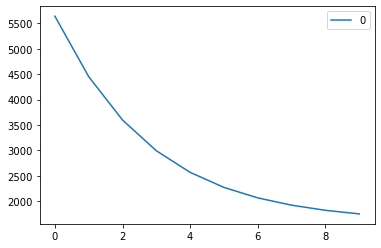

In [24]:
#second model: learning rate: 0.5, iterations:10
alpha = 0.5
iteration = 10

a, b = initialize()
costs = []
for idx in range(iteration):
    y_hat = get_prediction(X_train, a, b)
    y_hat_test = get_prediction(X_test, a, b)
    cost = calculate_cost(y_train, y_hat)
    val_cost = calculate_cost(y_test, y_hat_test)
    a, b = update_params(X_train, y_train, y_hat, a, b, lr=alpha)
    costs.append(cost)

new_df = pd.DataFrame(costs)
new_df.plot()
print('a: {0}, b: {1}'.format(a, b))
print("Cost: ",cost)

a: 6343.920863311508, b: -1172.667039576507
Cost:  1751.9880425883266


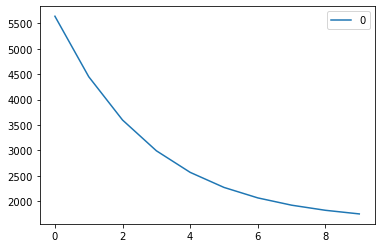

In [25]:
#third model: learning rate: 0.5, iterations:500
alpha = 0.5
iteration = 10

a, b = initialize()
costs = []
for idx in range(iteration):
    y_hat = get_prediction(X_train, a, b)
    y_hat_test = get_prediction(X_test, a, b)
    cost = calculate_cost(y_train, y_hat)
    val_cost = calculate_cost(y_test, y_hat_test)
    a, b = update_params(X_train, y_train, y_hat, a, b, lr=alpha)
    costs.append(cost)

new_df = pd.DataFrame(costs)
new_df.plot()
print('a: {0}, b: {1}'.format(a, b))
print("Cost: ",cost)